In [16]:
import json
import pandas as pd
from datetime import datetime as dt
import os
import glob
import math

from functions import custom


In [17]:
# Define your pattern, e.g., all .csv files in a directory
pattern = "../data/raw/getBelts/*"

# Get a list of files matching the pattern
files = list(filter(os.path.isfile, glob.glob(pattern)))

if files:
    # Sort files by modification time
    files.sort(key=lambda x: os.path.getmtime(x))
    # Get the most recently modified file
    fileName = files[-1]
    print("Most recent file:", fileName)
else:
    print("No files matched the pattern.")

Most recent file: ../data/raw/getBelts/snapshot-121620250303.json


In [18]:
f = open(fileName)
data = json.load(f)

f.close()


In [19]:
beltData = []

for belt in data:
    beltInfo = {
        'ID': belt['ID'],
        'splinePoints': len(belt['SplineData']),
        'beltLength': belt['Length'],
        'throughput': belt['ItemsPerMinute'],
        'class': belt['Name'].split(' ')[2]
    }
    
    
    beltData.append(beltInfo)

# Create the DataFrame
df = pd.DataFrame(beltData)

In [20]:
df.head()

,ID,splinePoints,beltLength,throughput,class
0,Build_ConveyorBeltMk1_C_2147393261,11,760.384277,60,Mk.1
1,Build_ConveyorBeltMk1_C_2147393220,9,601.661926,60,Mk.1
2,Build_ConveyorBeltMk1_C_2147371258,16,1148.175415,60,Mk.1
3,Build_ConveyorBeltMk1_C_2147463938,9,630.723511,60,Mk.1
4,Build_ConveyorBeltMk1_C_2147463793,4,299.983093,60,Mk.1


In [21]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

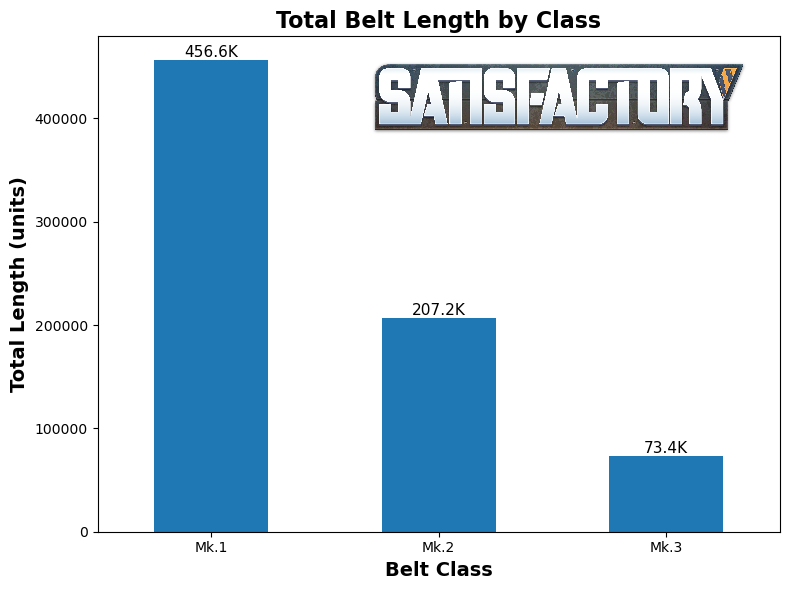

In [22]:
# Group by class and sum
total_by_class = df.groupby('class')['beltLength'].sum()

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
total_by_class.plot(kind='bar', ax=ax)

ax.set_xlabel('Belt Class', fontsize=14, fontweight='bold')
ax.set_ylabel('Total Length (units)', fontsize=14, fontweight='bold')
ax.set_title('Total Belt Length by Class', fontsize=16, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Add value labels on top of bars with friendly formatting
for i, v in enumerate(total_by_class):
    ax.text(i, v, custom.format_number(v), ha='center', va='bottom', fontsize=11)

# Add Satisfactory logo in top right corner
logo = Image.open('../satisfactory_logo_full_color.png')  # Path to your logo file
imagebox = OffsetImage(logo, zoom=0.05) # Adjust zoom to resize
ab = AnnotationBbox(imagebox, (0.95, 0.95), 
                    xycoords='axes fraction',
                    frameon=False,
                    box_alignment=(1, 1))
ax.add_artist(ab)

plt.tight_layout()
plt.show()


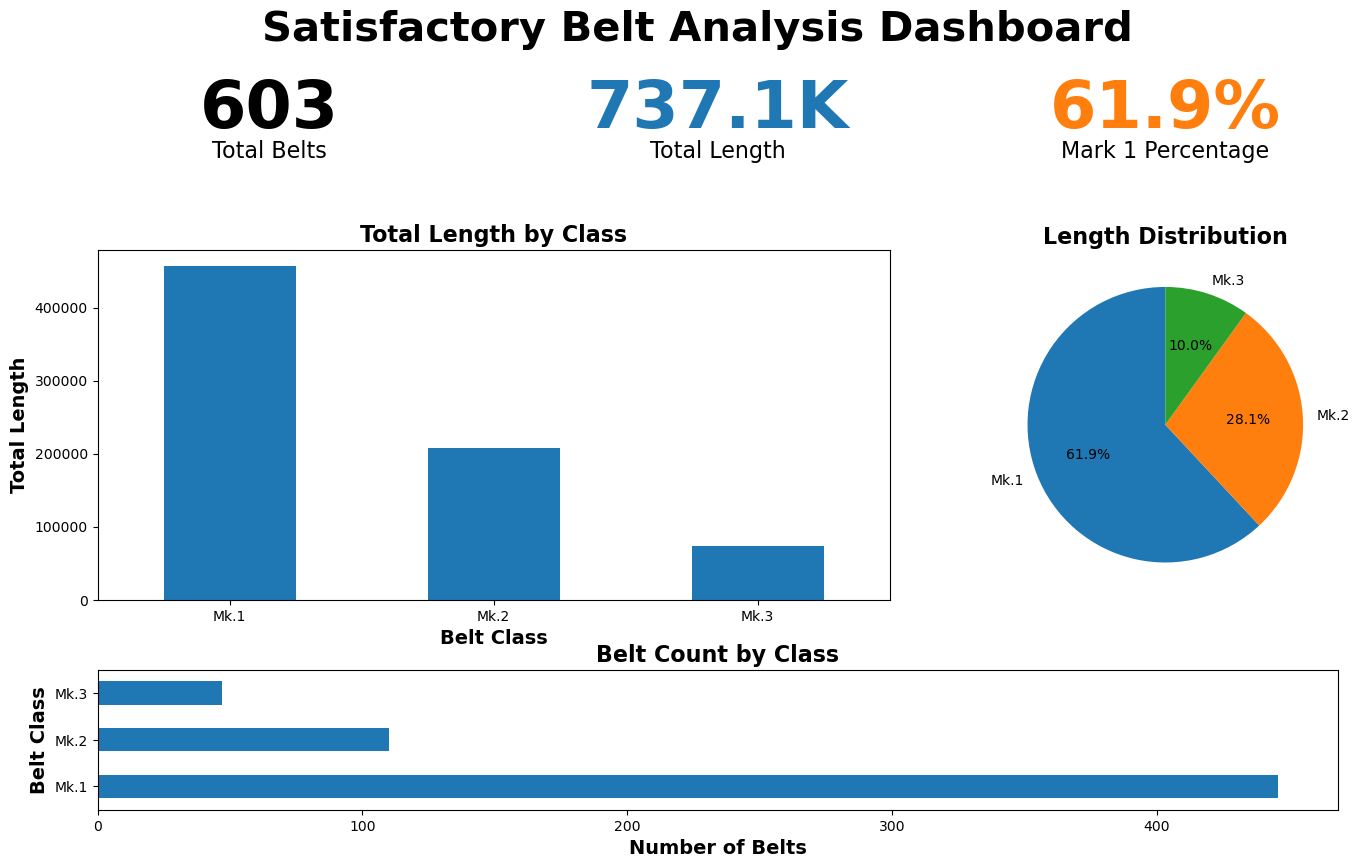

In [23]:
import matplotlib.gridspec as gridspec

# Prepare your data
total_belts = len(df)
total_length = df['beltLength'].sum()
length_by_class = df.groupby('class')['beltLength'].sum()
pct_by_class = (length_by_class / total_length * 100)

# Create figure with grid layout
fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(4, 3, figure=fig, hspace=0.5, wspace=0.3)

# Big number cards
ax1 = fig.add_subplot(gs[0, 0])
ax1.text(0.5, 0.5, f'{total_belts:,}', 
         ha='center', va='center', fontsize=48, fontweight='bold')
ax1.text(0.5, 0.2, 'Total Belts', ha='center', va='center', fontsize=16)
ax1.axis('off')

ax2 = fig.add_subplot(gs[0, 1])
ax2.text(0.5, 0.5, f'{custom.format_number(total_length)}', 
         ha='center', va='center', fontsize=48, fontweight='bold', color='#1f77b4')
ax2.text(0.5, 0.2, 'Total Length', ha='center', va='center', fontsize=16)
ax2.axis('off')

ax3 = fig.add_subplot(gs[0, 2])
mark1_pct = pct_by_class.get('Mk.1', 0)
ax3.text(0.5, 0.5, f'{mark1_pct:.1f}%', 
         ha='center', va='center', fontsize=48, fontweight='bold', color='#ff7f0e')
ax3.text(0.5, 0.2, 'Mark 1 Percentage', ha='center', va='center', fontsize=16)
ax3.axis('off')

# Bar chart - Total length by class
ax4 = fig.add_subplot(gs[1:3, :2])
length_by_class.plot(kind='bar', ax=ax4)
ax4.set_xlabel('Belt Class', fontsize=14, fontweight='bold')
ax4.set_ylabel('Total Length', fontsize=14, fontweight='bold')
ax4.set_title('Total Length by Class', fontsize=16, fontweight='bold')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)

# Pie chart - Percentage breakdown
ax5 = fig.add_subplot(gs[1:3, 2])
length_by_class.plot(kind='pie', ax=ax5, autopct='%1.1f%%', startangle=90)
ax5.set_ylabel('')
ax5.set_title('Length Distribution', fontsize=16, fontweight='bold')

# Another chart (e.g., belt count by class)
ax6 = fig.add_subplot(gs[3, :])
count_by_class = df.groupby('class').size()
count_by_class.plot(kind='barh', ax=ax6)
ax6.set_xlabel('Number of Belts', fontsize=14, fontweight='bold')
ax6.set_ylabel('Belt Class', fontsize=14, fontweight='bold')
ax6.set_title('Belt Count by Class', fontsize=16, fontweight='bold')

plt.suptitle('Satisfactory Belt Analysis Dashboard', 
             fontsize=30, fontweight='bold', y=0.91)
plt.show()
